In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson,norm

In [11]:
df_powerpose = pd.read_csv('df_powerpose.csv')
# Convert testosterone levels from pg/ml to ng/ml
df_powerpose['testm1'] *= 0.001
df_powerpose['testm2'] *= 0.001

df_powerpose.head()

,Unnamed: 0,id,hptreat,female,age,testm1,testm2
0,2,29,High,Male,19,0.038725,0.062375
1,3,30,Low,Female,20,0.032770,0.029235
2,4,31,High,Female,20,0.032320,0.027510
3,5,32,Low,Female,18,0.017995,0.028655
4,7,34,Low,Female,21,0.073580,0.044670


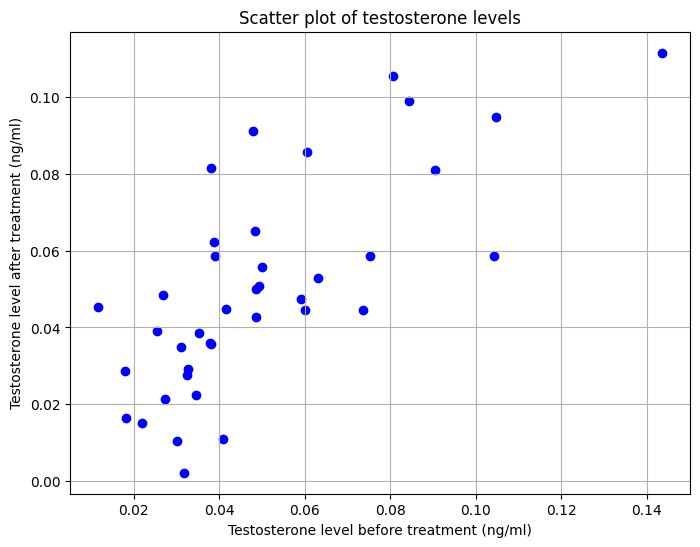

In [12]:
# Scatter plot of testosterone levels before and after treatment
plt.figure(figsize=(8, 6))
plt.scatter(df_powerpose['testm1'], df_powerpose['testm2'], color='blue')
plt.xlabel('Testosterone level before treatment (ng/ml)')
plt.ylabel('Testosterone level after treatment (ng/ml)')
plt.title('Scatter plot of testosterone levels')
plt.grid(True)
plt.show()

In [14]:
# helper function
def bayesian_linear_regression(X, y, alpha, beta, prior_mean, prior_cov):
    # Add intercept to X
    X = np.column_stack([np.ones_like(X), X])

    # Compute posterior parameters
    posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + beta * X.T @ X)
    posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + beta * X.T @ y)

    return posterior_mean, posterior_cov

In [15]:
X = df_powerpose['testm1'].values
y = df_powerpose['testm2'].values
prior_mean = np.zeros(2)  # Prior mean for intercept and coefficient
prior_cov = np.eye(2)  # Prior covariance matrix
alpha = 1.0  # Prior precision for intercept
beta = 1.0  # Prior precision for coefficients

posterior_mean, posterior_cov = bayesian_linear_regression(X, y, alpha, beta, prior_mean, prior_cov)
print("Posterior Mean:", posterior_mean)
print("Posterior Covariance Matrix:")
print(posterior_cov)

Posterior Mean: [0.04765298 0.02268764]
Posterior Covariance Matrix:
[[ 0.0272894  -0.04711117]
 [-0.04711117  0.96945293]]


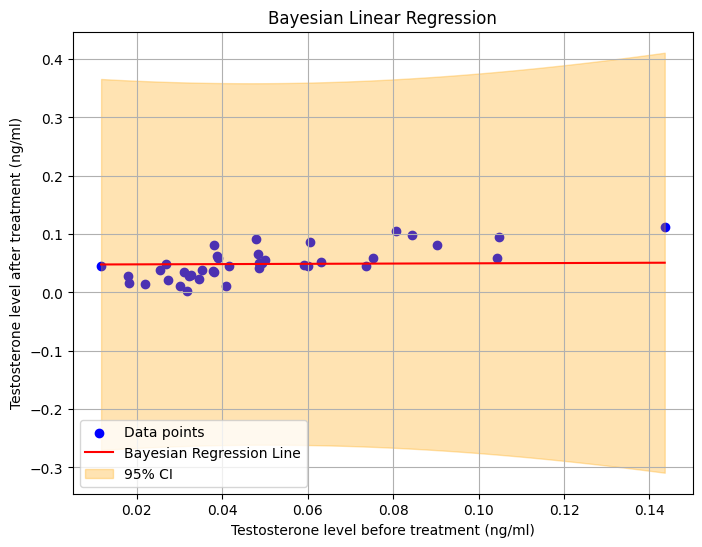

In [16]:
# Predictive mean and variance
X_pred = np.linspace(min(X), max(X), 100)
X_pred_with_intercept = np.column_stack([np.ones_like(X_pred), X_pred])
y_pred_mean = X_pred_with_intercept @ posterior_mean
y_pred_var = np.diag(X_pred_with_intercept @ posterior_cov @ X_pred_with_intercept.T)

# Plotting the Bayesian regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_pred, y_pred_mean, color='red', label='Bayesian Regression Line')
plt.fill_between(X_pred, y_pred_mean - 1.96 * np.sqrt(y_pred_var), y_pred_mean + 1.96 * np.sqrt(y_pred_var), color='orange', alpha=0.3, label='95% CI')
plt.xlabel('Testosterone level before treatment (ng/ml)')
plt.ylabel('Testosterone level after treatment (ng/ml)')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

Question 2

In [18]:
# part 1 helper function
def expected_crossings(sentence_length, alpha, beta):
    # Calculate log lambda
    log_lambda = alpha + beta * sentence_length
    
    # Calculate lambda (expected rate parameter)
    lambda_i = np.exp(log_lambda)
    
    # Generate Poisson distribution with lambda_i
    dist = poisson(mu=lambda_i)
    
    # Sample number of crossings Ni from the Poisson distribution
    Ni = dist.rvs()
    
    return Ni

In [25]:
# part 2
alpha_prior = norm(loc=0.15,scale=0.1)
beta_prior = norm(loc=0.25,scale=0.05)
nsamp = 1000
alpha_samples = alpha_prior.rvs(size=nsamp)
beta_samples = beta_prior.rvs(size=nsamp)
sentence_length = 4
prior_predictions = []
for alpha_sample, beta_sample in zip(alpha_samples, beta_samples):
    Ni_prior = expected_crossings(sentence_length, alpha_sample, beta_sample)
    prior_predictions.append(Ni_prior)
# Print some statistics of prior predictions
prior_predictions = np.array(prior_predictions)
print(f"Prior Predictions for Sentence Length {sentence_length}:")
print(f"Mean: {np.mean(prior_predictions):.2f}")
print(f"Standard Deviation: {np.std(prior_predictions):.2f}")
print(f"95th Percentile: {np.percentile(prior_predictions, 95):.2f}")

Prior Predictions for Sentence Length 4:
Mean: 3.28
Standard Deviation: 2.03
5th Percentile: 0.00
95th Percentile: 7.00


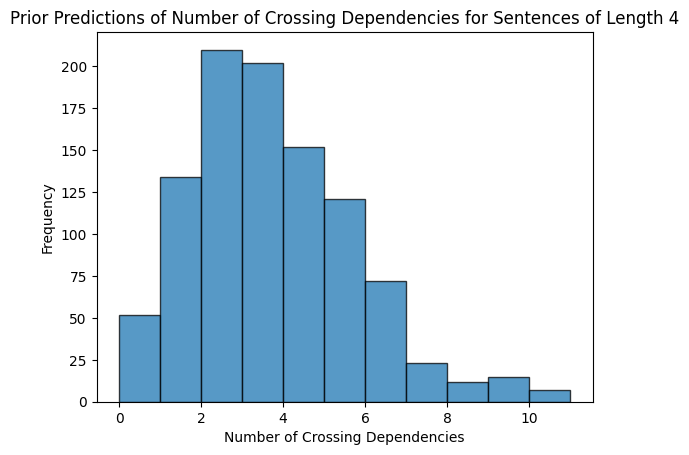

[2, 3, 4, 6, 4, 2, 3, 4, 5, 1]
Prior Predictions for Sentence Length 4:
Mean: 3.27
Standard Deviation: 2.00
95th Percentile: 7.00


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# helper function for generating prior predictions
def sample_prior_predictions(sentence_length, n_samples=1000):
    # Prior distributions for alpha and beta
    alpha_samples = np.random.normal(loc=0.15, scale=0.1, size=n_samples)
    beta_samples = np.random.normal(loc=0.25, scale=0.05, size=n_samples)
    
    # Generate predictions
    predictions = []
    for alpha, beta in zip(alpha_samples, beta_samples):
        number_of_crossings = expected_crossings(sentence_length, alpha, beta)
        predictions.append(number_of_crossings)
    
    return predictions

# Generate prior predictions for sentences of length 4
sentence_length = 4
prior_predictions = sample_prior_predictions(sentence_length)

# Plot the histogram of the prior predictions
plt.hist(prior_predictions, bins=range(min(prior_predictions), max(prior_predictions) + 1), alpha=0.75, edgecolor='black')
plt.title('Prior Predictions of Number of Crossing Dependencies for Sentences of Length 4')
plt.xlabel('Number of Crossing Dependencies')
plt.ylabel('Frequency')
plt.show()

# how the predictions look
print(prior_predictions[:10])
print(f"Prior Predictions for Sentence Length {sentence_length}:")
print(f"Mean: {np.mean(prior_predictions):.2f}")
print(f"Standard Deviation: {np.std(prior_predictions):.2f}")
print(f"95th Percentile: {np.percentile(prior_predictions, 95):.2f}")
